In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.special import gamma

# plotting parameters
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 15

In [2]:
def print_progress_bar(index, total, label):
    """
    prints progress bar for loops.

    :param index : current index of loop
    :param total : total number of indicies to loop over
    :param label : print statement next to progress bar

    """
    n_bar = 20  # Progress bar width
    progress = index / total
    sys.stdout.write('\r')
    sys.stdout.write(f"[{'=' * int(n_bar * progress):{n_bar}s}] {int(100 * progress)}%  {label}")
    sys.stdout.flush()

# Question 1

### Answer

$$
\small
P(A \cap B \cap C) = P(A | B \cap C)P(B \cap C)
$$

Using Bayes rule:

$$
\small
P(B \cap C) = P(B|C)P(C)
$$
Therefore:
$$
\small
P(A \cap B \cap C) = P(A | B \cap C)P(B|C)P(C)
$$

#### For n variables


$$
\small
P(A_1 \cap A_2 ... \cap A_n) = P(A_1|A_2 \cap A_3 ... \cap A_n) P(A_2 \cap A_3 ... \cap A_n)
$$

$$
\small
= P(A_1|A_2 \cap A_3 ... \cap A_n) P(A_2|A_3 \cap A_4 ... \cap A_n)P(A_3 \cap A_4 ... \cap A_n)
$$

$$
\small
= P(A_1|A_2 \cap A_3 ... \cap A_n) P(A_2|A_3 \cap A_4 ... \cap A_n) ... P(A_{n-2}|A_{n-1} \cap A_n)P(A_{n-1}|A_n)P(A_n)
$$

Therefore:
$$
\small
P(A_1 \cap A_2 ... \cap A_n) = \prod_{k-1}^{n}P(A_k| \cap_{i=1}^{k-1}A_{i})
$$


# Question 2 

### Answer

For a given probability-generating function (PGF), the distribution of $X$ can be found using the rule:

$$
\small
G(z) = P(0) + P(1)z + P(2)z^2 + ...
$$


Thus comparing to a Taylor expansion:


$$
\small
G(z) = G(0) + \frac{1}{1!}\frac{dG}{dz}\bigg|_{z=0}z + \frac{1}{2!}\frac{d^2G}{dz^2}\bigg|_{z=0}z^2 + ...
$$


then


$$
\small
P(X = n) = \frac{1}{n!}\frac{d^nG}{dz^n}\bigg|_{z=0}
$$


For $G(z) = \frac{z}{5}\left(2 + 3z^2\right)$


$$
\small
P(X = 0) = G(0) = 0
$$

$$
\,\,
$$

$$
\small
P(X = 1) = \frac{1}{1!}\frac{dG}{dz}\bigg|_{z=0} = \left[\frac{2}{5} + \frac{9}{5}z^2\right]_{z=0} = \frac{2}{5}
$$

$$
\,\,
$$

$$
\small
P(X = 2) = \frac{1}{2!}\frac{d^2G}{dz^2}\bigg|_{z=0} = \frac{1}{2!}\left(\frac{d}{dz}\left(\frac{dG}{dz}\right)\right)\bigg|_{z=0} = 
\frac{1}{2!}\left(\frac{d}{dz} \, P(X = 1) \right) \bigg|_{z=0}
$$

$$
\,\,
$$

$$
\small
P(X = 2) = \left[\frac{1}{2}\left(\frac{18}{5} z\right)\right]_{z=0} = 0
$$

$$
\,\,
$$

$$
\small
P(X = 3) = \frac{1}{3!}\frac{d^3G}{dz^3}\bigg|_{z=0} = \frac{1}{3!}\left(\frac{d}{dz}\left(\frac{d^2G}{dz^2}\right)\right)\bigg|_{z=0} = 
\frac{1}{3!}\left(\frac{d}{dz} 2! \, P(X = 2)\right) \bigg|_{z=0}
$$

$$
\,\,
$$

$$
\small
P(X = 3) = \left[\frac{1}{6}\left(\frac{18}{5} \right)\right]_{z=0} = \frac{3}{5}
$$

$$
\,\,
$$

Then all derivatives from here will equal zero, thus:

$$
\small
P(X = k) = 0 \, \text{for} \, k\geq 4
$$

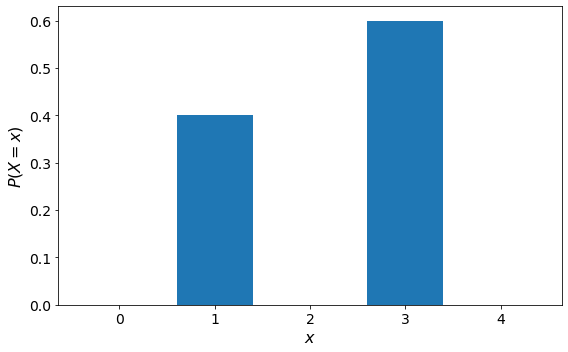

In [3]:
# plot the found P(X = x) from G(z)
plt.bar([0, 1, 2, 3, 4], [0, 0.4, 0, 0.6, 0.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$P(X = x)$')
plt.show()

# Question 3

### Answer

### Part i) Sum of independent normally distributed random numbers

$$
X_1 \sim \mathcal{N}(\mu_1, \sigma^2_{1})
$$
$$
X_2 \sim \mathcal{N}(\mu_2, \sigma^2_{2})
$$
$$
...
$$
$$
X_{n-1} \sim \mathcal{N}(\mu_{n-1}, \sigma^2_{n-1})
$$
$$
X_{n} \sim \mathcal{N}(\mu_{n}, \sigma^2_{n})
$$

$$
Z = \sum_{i=1}^{n} X_i
$$

$$
\phi_{Z}(t) = \mathrm{E}[e^{itZ}] = \mathrm{E}[e^{it \sum_{i=1}^{n} X_{i}}] = \mathrm{E}[e^{itX_{1}}e^{itX_{2}} ... e^{itX_{n-1}}e^{itX_{n}}] = \mathrm{E}[e^{itX_{1}}]\mathrm{E}[e^{itX_{2}}] ... \mathrm{E}[e^{itX_{n-1}}]\mathrm{E}[e^{itX_{n}}]
$$

i.e. a product of Normal distribution characteristic functions. Characteristic function for a normal distribution $\mathcal{N}(\mu, \sigma^2)$

$$
\phi_{normal}(t) = exp\left[{it\mu - \frac{\sigma^2t^2}{2}}\right]
$$

Thus, 

$$
\phi_Z(t) = exp\left[{it\mu_1 - \frac{\sigma_1^2t^2}{2}}\right] \cdot exp\left[{it\mu_2 - \frac{\sigma_2^2t^2}{2}}\right] ... exp\left[{it\mu_{n-1} - \frac{\sigma_{n-1}^2t^2}{2}}\right] \cdot exp\left[{it\mu_n - \frac{\sigma_n^2t^2}{2}}\right] = exp\left[it\sum_{i=1}^{n}{\mu_i} - \frac{t^2}{2}\sum_{i=1}^{n}\sigma^2_{i}\right]
$$

Defining $\mu_Z = \sum_{i=1}^{n}{\mu_i}$, $\sigma^2_Z = \sum_{i=1}^{n}{\sigma^2_i}$

Then,
$$
\phi_Z(t) = exp\left[{it\mu_{Z} - \frac{\sigma^2_{Z}t^2}{2}}\right]
$$

Thus,

$$
Z \sim \mathcal{N}(\mu_Z, \sigma^2_{Z}) = \mathcal{N}\left(\sum_{i=1}^{n}{\mu_i}, \sum_{i=1}^{n}{\sigma^2_i}\right)
$$

#### i.e. it is also a normal distribution with a mean and variance equal to the sum of the mean and variances of each sample

### Part ii) Gamma distributed random numbers with the same scale parameter $\theta$


Gamma Distribution, shape paramter $k$ and scale parameter $\theta$ 

$$
f(x) = \frac{1}{(n-1)! \, \theta^{k}}x^{k-1}\exp\left(-\frac{x}{\theta}\right)
$$

Have random numbers drawn from gamma distribution with scale parameter $\theta$ and differing shape parameter $X_{k_{i}} \sim \Gamma (k_{i}, \theta)$

$$
Z = \sum_{i=1}^{n} X_{k_i}
$$

As shown in the earlier example, for a sum of samples:

$$
\phi_{Z}(t) = \phi_{X_{k_1}}\phi_{X_{k_2}} \, ... \, \phi_{X_{k_{n-1}}}\phi_{X_{k_n}}
$$

Using the characteristic function definition for the gamma distribution:

$$
\phi_{Z}(t) = (1-it\theta)^{-k_1} (1-it\theta)^{-k_2} ... (1-it\theta)^{-k_{n-1}}(1-it\theta)^{-k_n}
$$

taking $k_Z = \sum_{i=1}^{n}k_{i}$, then

$$
\phi_{Z}(t) = (1-it\theta)^{-k_Z}
$$

Thus, 

$$
Z \sim \Gamma(k_Z, \theta) = \Gamma \left(\sum_{i=1}^{n}k_{i}, \theta \right)
$$

#### i.e. it is also a gamma distribution with a shape parameter equal to the sum of the shape parameters of each sample

# Question 4

### Answer

### Part i)

The formula gives the voltage change:

$$
V = \phi_0 (0, s^2) + \sum_{k=1}^{n} \delta_{k}\phi_k(a, \sigma^2)
$$

We have n+1 cases:

* K = 0 ; No vesicle is released
* K = 1; One vesicle is released across a contact
* K = 2; Two vesicles are released across two contacts
* ...
* K = n;  n vesicles n are released across n contacts

So for the first case:

* K = 0

$$
V = \phi_0(0, s^2)
$$

i.e the voltage is some normal random number sampled from $\mathcal{N}(0, s^2)$

Thus, the probability of observing the voltage $V$ given that only one synaptic contact has fired $P(V|K = 1)$; is defined by the Normal distribution $\mathcal{N}(0, s^2)$.

Then continuing the trend.

* K = 1

$$
V = \phi_0(0, s^2) + \phi_i(a, \sigma^2) = \phi(a, \sigma^2 + s^2)
$$

Where $i$ represents any one of the n synaptic contacts.

As we showed in the previous question that the sum of independent normally distributed random numbers is equivalent to a set of samples being taken from a normal distribution with mean $\mu = \sum_{i}\mu_{i}$; and variance $\sigma^2 = \sum_{i}\sigma^2_{i}$, hence the simplification.

Thus, the probability of observing the voltage $V$ given that only one synaptic contact has fired $P(V|K = 1)$; is defined by the Normal distribution $\mathcal{N}(a, \sigma^2 + s^2)$.


There is more that needs to be considered in this case. Yes, we will only have one synaptic contact realising a vesicle, but which one out of the n contacts? 

We have ${n \choose 1}$ combinations for $i$ with success probability p. 

Thus the probability in this case of having just one synaptic contacts firing is:

$$
P(K = 1) = {n \choose 1} p(1-p)^{n-1}.
$$

Then finally, the probability of getting the observed voltage for one synaptic contact firing would be 

$$
P(V) = P(V|K=1)P(K=1) = 
$$

Continuing this for two, we would find 

* K = 2

$$
V = \phi_0(0, s^2) + \phi_{i1}(a, \sigma^2) +  \phi_{i2}(a, \sigma^2)  = \phi(2a, 2 \sigma^2 + s^2)
$$

This time, $i1$ and $i2$ represent two unique contacts out of the n available.

Thus, the probability of observing the voltage $V$ given that only one synaptic contact has fired $P(V|K = 2)$; is defined by the Normal distribution $\mathcal{N}(2a, 2\sigma^2 + s^2)$.

This time we can have ${n \choose 2}$ combinations of $i1$ and $i2$ with probability of 2 contacts firing being

$$
P(K = 2) = {n \choose 2} p^2(1-p)^{n-2}
$$

Finally, to generalise, we will consider if we have $K=k$ contacts firing.

* K = k

The voltage would now be measured to be 

$$
V = \phi_0(0, s^2) + \phi_{i1}(a, \sigma^2) +  \phi_{i2}(a, \sigma^2) + ... + \phi_{i(k-1)}(a, \sigma^2) +  \phi_{ik}(a, \sigma^2) = \phi(ka, k\sigma^2 + s^2)
$$

where this time $i1, i2, ... i(k-1), ik$ represent k unique contacts out of the n available.

Thus, the probability of observing the voltage $V$ given that only one synaptic contact has fired $P(V|K = k)$; is defined by the Normal distribution $\mathcal{N}(ka, k\sigma^2 + s^2)$.

This time we can have ${n \choose k}$ combinations of $i1$ and $i2$ with probability of 2 contacts firing being

$$
P(K = k) = {n \choose k} p^k(1-p)^{n-k}
$$


Now that a relation has been found, we can use the conditioning rule to formulate the probability of achieving a certain voltage V:

$$
P(V) = \sum_{k=0}^{n} P(V|K = k) P(K = k)
$$

Where:

* K is the number of synaptic connections firing during an event.

* P(V|K = k) is defined by the normal distribution with mean $\mu = ka^2$ and variance $\sigma^2 = k \sigma^2 + s^2)$

* P(K = k) is defined by the binomial distribution with success probability p and number of trials n.

i.e.:

$$
P(V) =  \frac{f(V)}{\int f(V) dV}
$$

where

$$
f(V) = {\sum_{k=0}^{n} \frac{1}{\sqrt{2\pi \left(k\sigma^2 + s^2\right)}} \exp\left(-{\frac{\left(V - ka \right)^2}{2 \left(k\sigma^2 + s^2\right)}}\right) {n \choose k} p^{k}(1-p)^{n-k}} 
$$


### Part ii)

In [4]:
def bernoulli(p, N_trials):
    """
    Simulates Bernoulli trials for a sucess probability p.

    :param p : sucess probability
    :param N_trials : number of Bernoulli trials to perform

    """
    
    # sucess probability
    P_sucess = p
    # store Bernoulli results
    res = []
    # perform trials
    for i in range(N_trials):
        # get random number between 0 and 1
        P = np.random.rand(1)
        if P<P_sucess:
            res.append(1.0)
        else:
            res.append(0.0)
    # output results
    return np.array(res)


def V_samples(N_samples, a, sig, s, n, p):
    
    """
    Collects the voltage samples using given relation.

    :param N_samples : Number of samples to collect
    :param a : given mean for random Gaussian varibale
    :param sig : given standard deviation for random Gaussian varibale
    :param s : given standard deviation for random Gaussian noise
    :param n : number of neuron connections
    :param p : sucess probability of a connection firing
    
    """
    
    # array to store voltages
    V = np.array([])
    
    # iterate for N_samples
    for i in range(N_samples):
        # output the progress bar every 1 percent
        if np.mod(i, N_samples/100) == 0:
            print_progress_bar(index=i + N_samples/100, total=N_samples , label=f'sample {int(i + N_samples/100)}/{N_samples}')
        
        phi_k = np.random.normal(a, sig, n) # n normal distributed (mean = a, var = sig^2)
        delta_k = bernoulli(p, n) # n Bernoulli trials
        volt = np.random.normal(0, s, 1) + np.sum(delta_k*phi_k) # add Gaussian noise and sum Bernoulli trail results
        V = np.append(V, volt) # add voltage result to array
            
    return V
        

In [5]:
n = 10 # number of neuron connections
p = 0.3 # sucess probability of a connection firing
a = 0.2 # given mean for random Gaussian varibale
sig = 0.01 # given standard deviation for random Gaussian varibale
s = 0.05 # given standard deviation for random Gaussian noise

N_samples = 1000000 # number of samples

# collect samples
V = V_samples(N_samples, a, sig, s, n, p)

[====================] 100%  sample 1000000/1000000

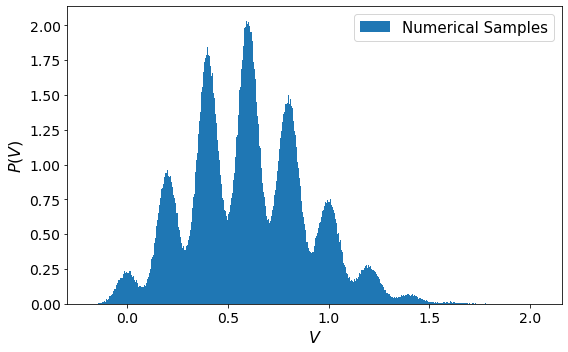

In [6]:
# find histogram
plt.hist(V, bins = 1000, label = 'Numerical Samples', density = True)
plt.ylabel(r'$P(V)$')
plt.xlabel(r'$V$')
plt.legend()
plt.show()

In [7]:
def normal(x, mu, sig):
    """
    Defines the normal pdf at point x for mean mu and var sig^2
    
    :param x : point at which to evaluate
    :param mu : mean
    :param sig : standard deviation
    
    """
    # normalisation
    N = 1/np.sqrt(2*np.pi * sig**2)
    return N*np.exp(-(x-mu)**2/(2*sig**2))

def factorial(n):
    """
    Function wrapper for factorial
    
    :param n : integer to take factorial of
    
    """
    return np.math.factorial(n)

def nCr(n,r):
    """
    Defines the binomial coefficient
    
    :param n : number of trials
    :param r : number of sucesses
    
    """
    return factorial(n) / (factorial(r) * factorial(n-r))

def binomial(n, p, k):
    """
    Defines the binomial distribution value for n trials
    with k sucesses.
    
    :param n : number of trials
    :param p : sucess probability
    :param k : number of sucesses
    
    """
    
    return nCr(n, k) * p**k * (1-p)**(n-k)


def trapezium(x, y):
    """
    Finds the integral of y = f(x) using the
    trapezium rule.
    
    :param x : x points
    :param y : y values
    
    """
    
    # number of trapeziums
    n = len(x)-1
    # spacing
    h = (x[-1]-x[0])/n
    # trapezium rule
    I_trap = (h/2)*(y[0] + \
          2 * sum(y[1:n]) + y[n])
    return I_trap

def analytic_voltage_dist(V, a, sig, s, p, n):
    """
    Outputs the analytic voltage distribution discussed above.
    
    :param V : voltages to determine the distribution at
    :param a : given mean for random Gaussian varibale
    :param sig : given standard deviation for random Gaussian varibale
    :param s : given standard deviation for random Gaussian noise
    :param p : sucess probability of a connection firing
    :param n : number of neuron connections
    
    """
    # start the sum at 0
    f_V = 0
    
    # loop over all k values (i.e all number of sucess values)
    for k in range(n+1):
        
        mean = k*a # mean
        std = np.sqrt(k*sig**2 + s**2) # standard deviation
        
        Gaussian = normal(V, mu = mean, sig = std) # normal part
        Binomial = binomial(n, p, k) # binomial part
        
        f_V += Gaussian * Binomial # add term to sum
        
    integral = trapezium(x = V, y = f_V) # find the integral to normalise distribution
    
    P_V = f_V/integral # normalised distribution
    
    return P_V
    

In [8]:
# determine anlaytic function at set points
V_space = np.linspace(-0.1, n*a, 150)
analytic_dist = analytic_voltage_dist(V_space, a, sig, s, p, n)

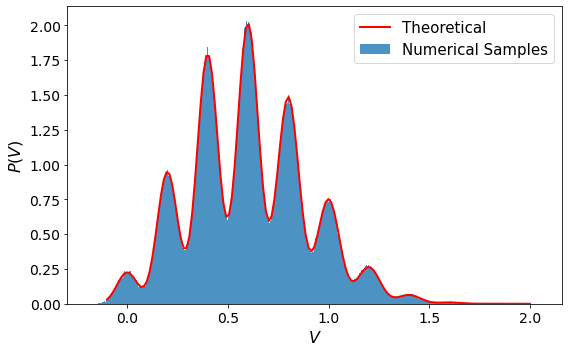

In [9]:
# plot theoretical vs numercial samples
plt.plot(V_space, analytic_dist, c='r', label = 'Theoretical')
plt.hist(V, bins = 1000, label = 'Numerical Samples', density = True, alpha = 0.8)
plt.ylabel(r'$P(V)$')
plt.xlabel(r'$V$')
plt.legend()
plt.show()

As we can see from the plot above, the two distributions are closely matched.

# Question 5

Find the number of non-negative integer solutions to:

$$
x_1 + x_2 + ... + x_{k-1} + x_k = n
$$

### Answer

As each number $x_1, x_2, ..., x_{k-1}, x_k $ are non-negative integers, then we can think of each number being some multiple of one.

Thus in this case, for $x_1 + x_2 + ... + x_{k-1} + x_k = n$ we have $n$ ones. Thus if we split the equation into two parts, ones and pluses, we have $n$ ones and $k-1$ pluses we can rearrange to form a solution to $x_1 + x_2 + ... + x_{k-1} + x_k = n$. Thus, we have $n + (k-1)$ indistinguishable objects we can rearrange to solve for $x_1 + x_2 + ... + x_{k-1} + x_k = n$ depending on where we place the $k-1$ plusses with respect to the ones.


Thus the total combinations that are possible are:

$$
\frac{\left(n + k - 1\right)!}{n!\left(k - 1\right)!} = \frac{\left(n + k - 1\right)!}{\left( \left(n + k - 1\right)  - \left(k - 1\right) \right)! \left(k-1\right)!}  = C^{n + k -1}_{k-1}
$$

i.e. for n = 3, k = 3, we have the following solutions: (here the * represents ones and | represents pluses)

* (1) $\,$ $ 0|0|*** $
* (2) $\,$ $ *|0|**$
* (3) $\,$ $ **|0|*$
* (4) $\,$ $ ***|0|0 $
* (5) $\,$ $ **|*|0 $
* (6) $\,$ $ *|**|0 $
* (7) $\,$ $ 0|***|0 $
* (8) $\,$ $ 0|**|* $
* (9) $\,$ $ 0|**|* $
* (10) $\,$ $*|*|*$

we have 10 combinations, which is the same as $ \frac{\left(3 + 3 - 1\right)!}{3! \left(3-1\right)!} = \frac{6!}{3!2!} = \frac{5 \times 4}{2} = 10$


# Question 6

### Answer

In [10]:
def chi_square_dist(x, k):
    """
    Outputs the chi square distribution at x for k
    degrees of freedom
    
    :param x : value to evaluate at
    :param k : degrees of freedom parameter
    
    """
    
    # normalisation
    factor = 1/(2**(0.5*k) * gamma(0.5*k))
    
    return factor * x**(0.5*k - 1) * np.exp(-0.5*x)

In [11]:
mu = 5 # given mean
sigma = 1 # given standard deviation
n = 30  # number of points

N_samples = 1000 # number of samples

# sample means
sample_mean = np.array([])
# sample variances
sample_var = np.array([])

for i in range(N_samples):
    
    # random numbers
    X = np.random.normal(mu, sigma, n)
    # sample mean
    mean = np.sum(X)/n
    sample_mean = np.append(sample_mean, mean)
    # unbiased sample variance
    var = np.sum((X - mean)**2)/(n-1)
    sample_var = np.append(sample_var, var)

The sample mean for many samples approaches a normal distribution with mean $\mu$ and variance $\frac{\sigma^2}{n}$.

i.e

$$
\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right) 
$$

The distribution of the unbiased sample variance $\left(s^2_{X} \right)$ is found to behave per the chi-square distribution.

Find that 

$$
\frac{s^2_{X} \left(n-1\right)}{\sigma^2} \sim \chi^2_{n-1}
$$

Which is the chi-distribution with the number of degrees of freedom equalling $n-1$.

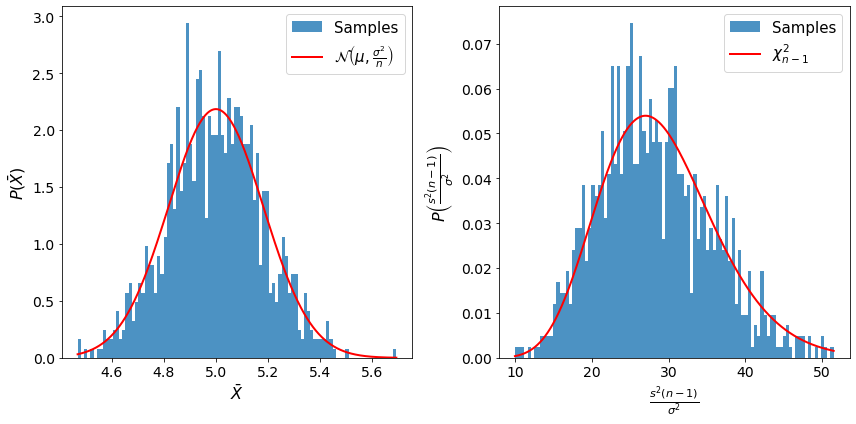

In [12]:
# plot theoretical distributions vs samples
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# mean theoretical
mean_space = np.linspace(sample_mean.min(), sample_mean.max(), 1000)
sample_mean_theoretical = normal(x = mean_space, 
                                 mu = mu, 
                                 sig = sigma/np.sqrt(n))
# variance theoretical
var_new = sample_var*(n-1)/sigma**2
var_space = np.linspace(var_new.min(), var_new.max(), 1000)
sample_var_theoretical = chi_square_dist(x = var_space,
                                         k = n-1)
# plots
ax1.hist(sample_mean, bins=100, density = True, alpha = 0.8, label = 'Samples')
ax2.hist(var_new, bins=100, density = True, alpha = 0.8, label = 'Samples')
ax1.plot(mean_space, sample_mean_theoretical, c = 'r', label =r'$\mathcal{N}\left(\mu , \frac{\sigma^2}{n}\right)$')
ax2.plot(var_space, sample_var_theoretical, c = 'r', label = r'$\chi^2_{n-1}$')
ax1.set_xlabel(r'$\bar{X}$')
ax2.set_xlabel(r'$\frac{s^2 (n-1)}{\sigma^2}$')
ax1.set_ylabel(r'$P \left(\bar{X}\right)$')
ax2.set_ylabel(r'$P\left(\frac{s^2 (n-1)}{\sigma^2}\right)$')

ax1.legend()
ax2.legend()


plt.show()

# Question 7

### Answer

z statistic:

$$
z = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s^2_{X_1}}{n_{X_1}} + \frac{s^2_{X_2}}{n_{X_2}}}}
$$

Where $s^2$ is the unbiased sample variance 

$$
s^2_{X} = \frac{1}{n_X - 1}\sum_{k=1}^{n}\left(X_{k} - \bar{X}\right)^2
$$

In [13]:
# class 1 results
X_1 = np.array([65, 73, 51, 67, 48, 80, 69, 83, 89, 62,
                    71, 67, 64, 78, 85, 49, 80, 60, 51, 70])
# class 2 results
X_2 = np.array([63, 72, 47, 63, 44, 78, 67, 52, 54, 58,
                    68, 65, 63, 77, 62, 46, 78, 56, 49, 65])

# sample mean class 1
X_bar_1 = np.sum(X_1)/len(X_1)
# sample mean class 2
X_bar_2 = np.sum(X_2)/len(X_2)

# unbiased sample variance class 1
sample_var_X_1 = np.sum((X_1 - X_bar_1)**2)/(len(X_1) - 1)
# unbiased sample variance class 2
sample_var_X_2 = np.sum((X_2 - X_bar_2)**2)/(len(X_2) - 1)

In [14]:
# numerator of z
z_num = (X_bar_1 - X_bar_2)
# denominator of z
z_denom = np.sqrt(sample_var_X_1/(len(X_1)) + sample_var_X_2/(len(X_2)))

# z score
z = z_num/z_denom
print(f'Z score of the two classes (z_test) = {z}')

Z score of the two classes (z_test) = 1.870532964313681


p_value (z test) = 6.193542385007877 %


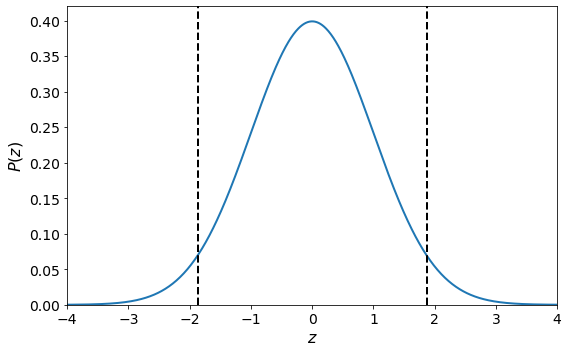

In [15]:
# find normal dist for mean 0, var 1
x_space = np.linspace(-5, 5, 1000)
dist = normal(x = x_space, mu = 0, sig = 1)

# deduce points which is between -z and z
idx_min = np.where(x_space > - z)[0][0]-1
idx_max = np.where(x_space > z)[0][0]-1

# find area under curve from -z to z
area = trapezium(x=x_space[idx_min:idx_max], y=dist[idx_min:idx_max])

# find p value from 1 - area 
p_value = 1-area

# confidence level
print(f'p_value (z test) = {p_value * 100} %')

# plot of interval on normal dist
plt.plot(x_space, dist)
plt.ylabel(r'$P(z)$')
plt.xlabel(r'$z$')
plt.xlim(-4, 4)
plt.ylim(0, 0.42)
plt.axvline(x = -z , c = 'black', ls ='--')
plt.axvline(x = z , c = 'black', ls ='--')
plt.show()

From the found p-value of 6.1 %, we would have significant evidence to reject the null hypothesis at anything above the 6.1 % level (i.e. at the 10 % level).


A more appropriate test to use here would be the two-tailed t-test with a t-distribution with degrees of freedom 19 rather than the two-tailed z-test. This is because we only have a relatively small sample size of 20, and thus the samples $X_1$ and $X_2$ may follow a different distribution. Therefore, given the relatively small sample size, a t-test would be preferable.

# Question 8

### Answer

### Part i)

In [16]:
# probability of getting heads 
p = 0.7
# number of coin flips
flips = 100
# outcomes of coin flips
outcome = np.array([])

for i in range(flips):
    # random number between 0 and 1
    num = np.random.rand(1)
    
    if num <= p:
        # heads
        outcome = np.append(outcome,'H')
    else:
        # tails
        outcome = np.append(outcome, 'T')
        
print(outcome)

['H' 'H' 'H' 'T' 'T' 'T' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T'
 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'T' 'T' 'H' 'T' 'H' 'H' 'H' 'H' 'H' 'T' 'T'
 'H' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'T' 'H'
 'H' 'T' 'H' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'H' 'T' 'H']


In [17]:
n_heads = len(np.where(outcome == 'H')[0])
n_tails = len(np.where(outcome == 'T')[0])

print(f'Number of Heads observed = {n_heads}')
print(f'Number of Tails observed = {n_tails}')

Number of Heads observed = 71
Number of Tails observed = 29


### Likelihood

The Likelihood of this particular observation Data (D) for our given hypothesis $H$ (i.e. a coin defined with some probability $p$ of getting a head), is :

$$
\mathcal{L}\left(p\right) = \prod_{i=1}^{n_{flips}} P_{i}(D|p) = p_{h}^{n_{h}} \,\, p_{t}^{n_{t}} = p^{n_{h}} \,\, (1-p)^{n_{t}}
$$

where the $h, t$ subscripts represnet heads and tails respectively, making $n_h$ and $n_t$ the number of acheived heads and tails respectively.

In [18]:
# likelihood of specific case above

likelihood_flips = p**n_heads * (1-p)**n_tails

print(f'Likelihood of output flips = {likelihood_flips}')

Likelihood of output flips = 6.89409443219357e-27


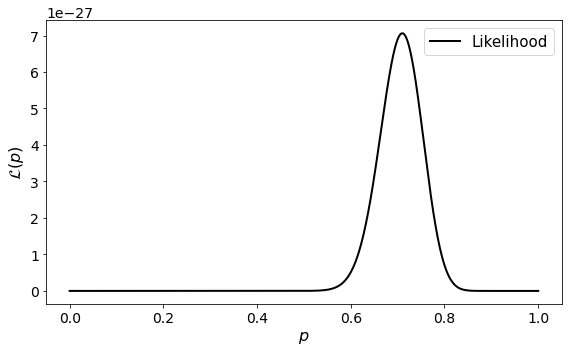

In [19]:
p_space = np.linspace(0, 1, 100000, endpoint = True)

likelihood = p_space**n_heads * (1-p_space)**n_tails

plt.plot(p_space, likelihood, c = 'black', label = 'Likelihood')
plt.ylabel(r'$\mathcal{L}\left(p\right)$')
plt.xlabel(r'$p$')
plt.legend()
plt.show()

### Posteriors

#### Hypothesis 1 : $H_1: P(p) = 1$ (i.e uniform prior)

In this case, we have a flat prior; thus, our posterior is 

$$
P(p|D) \propto \prod_{i=1}^{n_{flips}} (P_i(D|p)) P(p) = p^{n_{h}} \,\, (1-p)^{n_{t}}
$$

#### Hypothesis 2 : $H_2: P(p) = p(1-p^4)$ 

In this case, we no longer have a flat prior; thus our posterior is proportional to 

$$
P(p|D) \propto \prod_{i=1}^{n_{flips}} (P_i(D|p)) P(p) = p^{n_{h}} \,\, (1-p)^{n_{t}} \,\, p (1-p^{4})
$$


In [20]:
def norm_dist(x, dist):
    """
    Outputs the normalised distribution 
    (i.e forces integral to be 1)
    
    :param x : x domain
    :param dist : distribution to normalise
    
    """
    # integral normalisation
    integral =  trapezium(x = x, y = dist)
    return dist/integral

In [21]:
# likelihood function
likelihood = p_space**n_heads * (1-p_space)**n_tails

# unifrom prior
prior_1 = np.ones(len(p_space))
# alternative prior
prior_2 = p_space*(1-p_space**4)

# posterior for uniform prior
post_1 = norm_dist(x = p_space, dist = likelihood * prior_1) 
# posterior for non-uniform prior
post_2 = norm_dist(x = p_space, dist = likelihood * prior_2) 

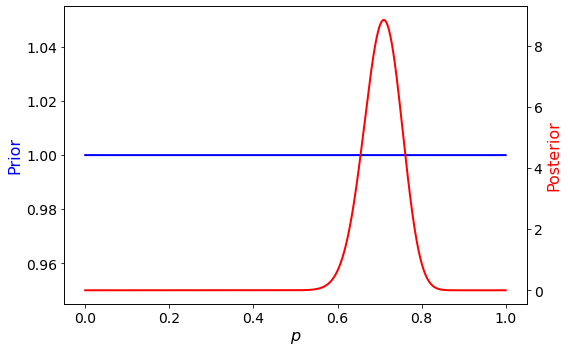

In [22]:
# plots of priors and posteriors for Hypothesis 1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(p_space, prior_1, label = r'$P(p) = 1$', c = 'b')
ax2 = ax.twinx()
ax2.plot(p_space, post_1, label = r'$P(p|D)$', c = 'r')
ax.set_xlabel('$p$')
ax.set_ylabel('Prior', c  = 'b')
ax2.set_ylabel('Posterior', c = 'r')


plt.show()

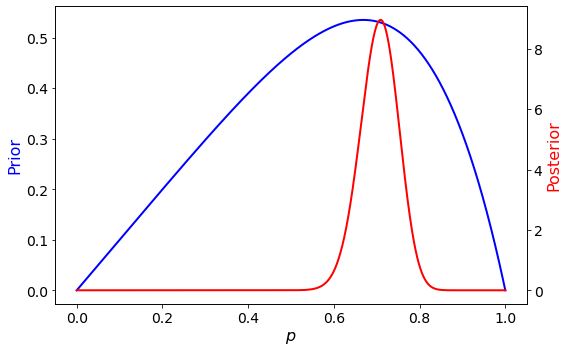

In [23]:
# plots of priors and posteriors for Hypothesis 2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(p_space, prior_2, label = r'$P(p) = 1$', c = 'b')
ax2 = ax.twinx()
ax2.plot(p_space, post_2, label = r'$P(p|D)$', c = 'r')
ax.set_xlabel('$p$')
ax.set_ylabel('Prior', c  = 'b')
ax2.set_ylabel('Posterior', c = 'r')


plt.show()

### Part ii)

The Highest Posterior Density Region is the set of most probable values of $\theta$ that, in total, constitute $100(1-\alpha) \%$  of the posterior area.

In other words, for a given $\alpha$, we look for a $k$ that satisfies:

$$
1-\alpha = \int_{\theta : P\left(\theta|D\right) > k} P\left(\theta|D\right) \mathrm{d}\theta
$$


The aim is thus to find a value of $k$ that satisfies this relation for a given alpha.

Numerically, this is done by drawing horizontal lines of various heights ($k$). Finding the region where the posterior value is greater than or $k$, and then estimating the integral. Eventually, when a $k$ value is found to achieve the correct fraction of area, this region's minimum and maximum bounds define the Highest Posterior Density Region.

In [24]:
def highest_posterior_density(x, posterior, CI = 0.9, n = 1000, y_min = None, y_max = None):
    
    """
    Function that determines the highest_posterior_density interval
    for a set confidence range CI.
    
    :param x : x domain
    :param posterior : posterior distribution
    :param CI : confidence interval (default is 90 %)
    :param n : number of horizontal lines to trial
    :param y_min : minimum horizontal line height 
    :param y_max : maximum horizontal line height
    
    """
    
    # ensure the posterior is normalised (i.e area = 1)
    posterior = norm_dist(x = x, dist = posterior)
    
    # if no min and max value specified, use the posterior range
    if y_min == None:
        y_min = posterior.min()
    if y_max == None:
        y_max = posterior.max()
        
    # horizontal lines to try
    k = np.linspace(y_min, y_max, n)
    
    # find area under posterior between the intersection points of line k
    for i in range(len(k)):
        # intersections
        idx = np.where(posterior > k[i])[0]
        # if only one, skip (as this is 0 %)
        if len(idx) <=1:
            continue
        # index of minimum intersection point
        idx_min = idx[0] - 1
        # index of maximum intersection point
        idx_max = idx[-1] + 1
        # area under the curve between intersection points
        area = trapezium(x = x[idx_min:idx_max], y = posterior[idx_min:idx_max])
        
        # keep going until condition is determined
        if area < CI:
            break
    
    # range
    x_min = x[idx_min]
    x_max = x[idx_max]
    
    return x_min, x_max, k[i]

In [25]:
# find 90 % CI for posterior example from part 1
p_min, p_max, k = highest_posterior_density(p_space, post_2, CI = 0.9, n = 1000, y_min = None, y_max = None)

print(f'P_min = {p_min}')
print(f'P_max = {p_max}')

P_min = 0.6325163251632516
P_max = 0.7781877818778188


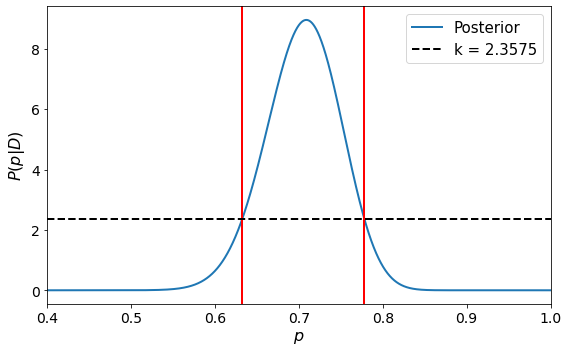

In [26]:
# plot confidence range on posterior
plt.plot(p_space, norm_dist(x = p_space, dist = post_2), label = 'Posterior')
plt.xlabel(r'$p$')
plt.ylabel(r'$P(p|D)$')
plt.axvline(p_min, c = 'r', ls = '-')
plt.axvline(p_max, c = 'r', ls = '-')
plt.axhline(k, c = 'black', ls = '--', label = f'k = {np.round(k, 4)}')
plt.xlim(0.4, 1.0)
plt.legend()
plt.show()

# Question 9

### Answer


The likelihood for n independant draws $\left(X_1, X_2, ..., X_{n-1}, X_n \right)$ from an exponential distribution:

$$
P(\mathbf{X}|\lambda)  = \prod_{j=1}^{n} \lambda \text{exp}\left(-\lambda X_{j}\right) = \lambda^n \text{exp}\left(-\lambda \sum_{j=1}^{n}X_{j}\right)
$$

Have a gamma distributed prior for $\lambda$, with shape and rate paramter $\alpha$ and $\beta$ respectively:

$$
P(\lambda) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha - 1} \exp\left( -\beta\lambda\right)
$$

The posterior distribution $P(\lambda|\mathbf{X})$ is proportional to the product of the likelihood and the prior.

Thus,

$$
P(\lambda|\mathbf{X}) \propto P(\mathbf{X}|\lambda) \, P(\lambda)
$$

$$
\rightarrow P(\lambda|\mathbf{X}) \propto \lambda^n \text{exp}\left(-\lambda \sum_{j=1}^{n}X_{j}\right) \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha - 1} \exp\left( -\beta\lambda\right)
$$

$$
\rightarrow P(\lambda|\mathbf{X}) \propto \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{n + \alpha - 1} \text{exp}\left(-\lambda \left( \sum_{j=1}^{n}X_{j} + \beta \right) \right)
$$

This shows that the posterior is proportional to a gamma distribution with new shape parameter $\alpha^{\prime}$ and rate parameter $\beta^{\prime}$, where:

$$
\rightarrow \alpha^\prime = n + \alpha
$$

$$
\rightarrow \beta^\prime = \sum_{j=1}^{n} X_{j} + \beta
$$
